In [69]:
# https://datascienceplus.com/keras-regression-based-neural-networks/
# https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_04_3_regression.ipynb
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
# https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
# https://stackoverflow.com/questions/49008074/how-to-create-a-neural-network-for-regression
# https://www.pyimagesearch.com/2019/01/21/regression-with-keras/
# https://www.tensorflow.org/tutorials/keras/regression?hl=en
# https://keras.rstudio.com/articles/tutorial_basic_regression.html

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import clear_output
from livelossplot import PlotLossesKeras
from time import time
from keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from keras.models import load_model

from ann_visualizer.visualize import ann_viz;
from keras.models import model_from_json

from keras_sequential_ascii import keras2ascii
from livelossplot import PlotLossesKeras

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

import os;
path="."
os.chdir(path)
os.getcwd()

# Variables
dataset=np.loadtxt("../../data/dataset_TD.csv", delimiter=",")
x=dataset[:,0:3]
y=dataset[:,3] # 0: X, 1: T, 2: I, 3: TD (thermal diffusion)

In [70]:
# 2D Plot
#plt.scatter(dataset[:,1], dataset[:,3], s=0.5)
#plt.title('Thermal diffusion')
#plt.xlabel('T [K]')
#plt.ylabel(r'$D_T$ $[m^2/s]$')
#plt.tight_layout()
#plt.savefig("thermal_diffusion_2d.pdf", dpi=150)
#plt.show()

# 3D Plot
#fig = plt.figure()
#ax = Axes3D(fig)
#ax.scatter(dataset[:,0], dataset[:,1], dataset[:,3], s=0.5)
#ax.set_xlabel('molar fraction', rotation=150)
#ax.set_ylabel('T [K]')
# disable auto rotation
#ax.zaxis.set_rotate_label(False) 
#ax.set_zlabel(r'$D_T$ $[m^2/s]$', rotation = 0, labelpad=13)
#ax.dist = 14
#plt.savefig("thermal_diffusion_3d.pdf", dpi=150)
#plt.show()

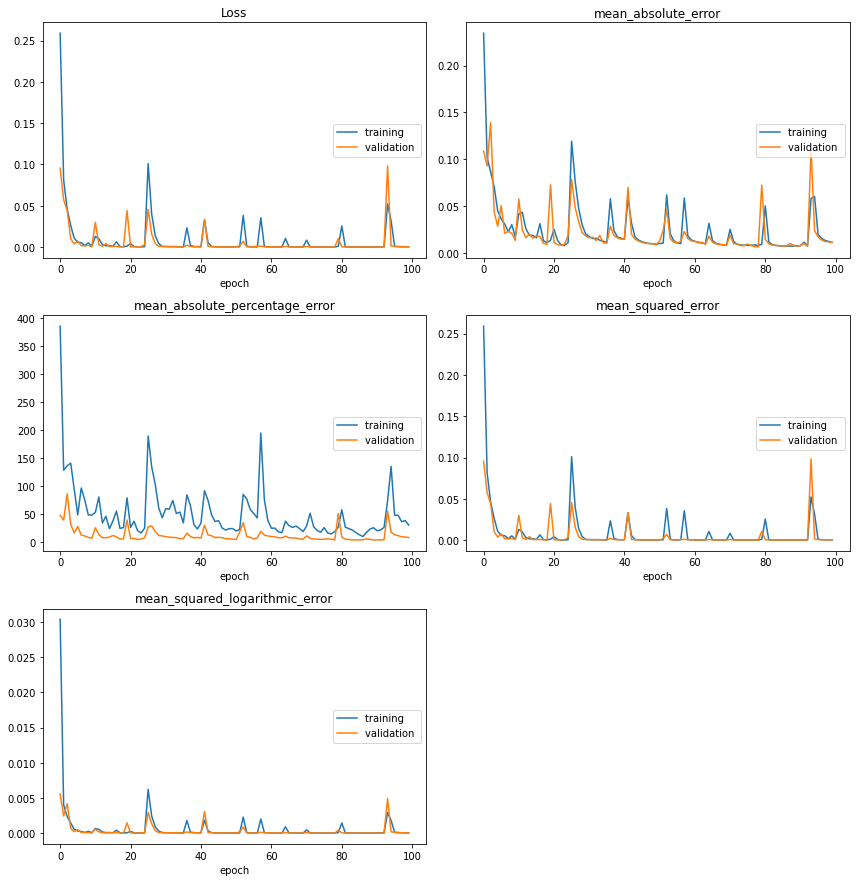

Loss
	training         	 (min:    0.000, max:    0.259, cur:    0.000)
	validation       	 (min:    0.000, max:    0.098, cur:    0.000)
mean_absolute_error
	training         	 (min:    0.007, max:    0.235, cur:    0.011)
	validation       	 (min:    0.006, max:    0.139, cur:    0.011)
mean_absolute_percentage_error
	training         	 (min:   10.622, max:  386.140, cur:   31.067)
	validation       	 (min:    4.318, max:   86.852, cur:    8.859)
mean_squared_error
	training         	 (min:    0.000, max:    0.259, cur:    0.000)
	validation       	 (min:    0.000, max:    0.098, cur:    0.000)
mean_squared_logarithmic_error
	training         	 (min:    0.000, max:    0.030, cur:    0.000)
	validation       	 (min:    0.000, max:    0.006, cur:    0.000)
172480/172480 - 3s - loss: 3.0328e-04 - mean_squared_error: 3.0328e-04 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 31.0668 - mean_squared_logarithmic_error: 4.1908e-05 - val_loss: 4.1012e-04 - val_mean_squared_erro

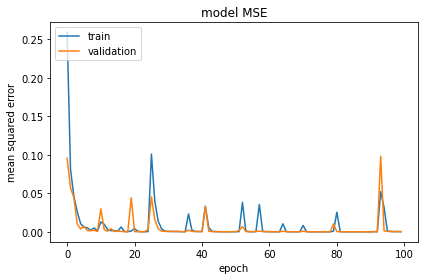

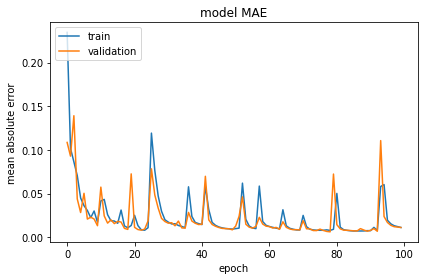

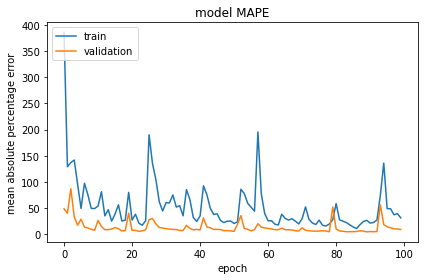

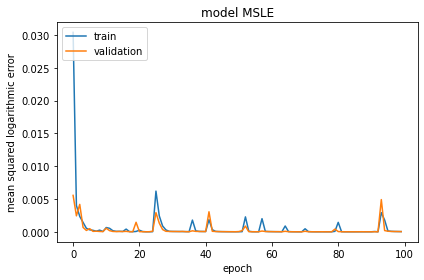

[INFO] predicting...
Final score (MSE): 0.00041011491385899016
Final score (MAE): 0.011155883249579572
Final score (RMSE): 0.0202512941280055


In [71]:
# Since implementing a neural network, the variables need to be normalized in order for the neural network to interpret
# them properly. Therefore, variables are transformed using the MaxMinScaler() or StandardScaler()
y=np.reshape(y, (-1,1))
#scaler_x = MinMaxScaler()
#scaler_y = MinMaxScaler()
scaler_x = StandardScaler()
scaler_y = StandardScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

# Create train/test
# The data is split into training and test data
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.2, random_state=42)

#plt.scatter(xscale[:,1], yscale, s=0.5)
#plt.title(' ')
#plt.xlabel(' ')
#plt.ylabel(' ')
#plt.show()

model = Sequential()

# Usually it's a good practice to apply following formula in order to find out the total number of hidden layers needed.
#
# Nh = Ns/(α∗ (Ni + No))
#
# where
#
#    Ni = number of input neurons.
#    No = number of output neurons.
#    Ns = number of samples in training data set.
#    α = an arbitrary scaling factor usually 2-10.

model.add(Dense(25, input_dim=3, kernel_initializer='normal', activation='relu')) # Hidden 1
#model.add(Dropout(0.2, input_shape=(3,)))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dropout(0.2))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dropout(0.2))
#model.add(Dense(25, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dropout(0.2))
#model.add(Dense(25, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dropout(0.2))
#model.add(Dense(25, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dropout(0.2))
#model.add(Dense(25, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dropout(0.2))
#model.add(Dense(20, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dropout(0.2))
#model.add(Dense(20, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dropout(0.2))
#model.add(Dense(20, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))                                            # Output
model.summary()

keras2ascii(model)

# https://www.programcreek.com/python/example/104282/keras.optimizers.Adam
# https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/
# lrate = initial_lrate * (1 / (1 + decay * iteration))
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
#opt = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.01)

# https://keras.io/api/optimizers/adam/
#opt = keras.optimizers.Adam(learning_rate=lr_schedule)
#opt = keras.optimizers.Adam(learning_rate=0.01)
opt = keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# mse:  loss = square(y_true - y_pred)
# mae:  loss = abs(y_true - y_pred)
# mape: loss = 100 * abs(y_true - y_pred) / y_true
# msle: loss = square(log(y_true + 1.) - log(y_pred + 1.))
model.compile(loss='mse', optimizer=opt, metrics=['mse', 'mae', 'mape', 'msle'])

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Train model
# https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network
# The validation_split set to 0.2, 80% of the training data is used to test the model, while the remaining 20% is used for testing.
# Since the dataset_TD file contains 215600 items is convenient to set batch_sie = 77 or 539 to be divisible
history = model.fit(X_train, y_train, epochs=100, batch_size=539, verbose=2, validation_data=(X_test, y_test), callbacks=[PlotLossesKeras()])
#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[monitor], verbose=2, batch_size=50, epochs=100)

# Plot metrics
print(history.history.keys())

# "Loss"
plt.figure()
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model MSE')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.savefig("MSE.pdf", dpi=150)
plt.show()

plt.figure()
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.savefig("MAE.pdf", dpi=150)
plt.show()

plt.figure()
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model MAPE')
plt.ylabel('mean absolute percentage error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.savefig("MAPE.pdf", dpi=150)
plt.show()

plt.figure()
plt.plot(history.history['mean_squared_logarithmic_error'])
plt.plot(history.history['val_mean_squared_logarithmic_error'])
plt.title('model MSLE')
plt.ylabel('mean squared logarithmic error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.savefig("MSLE.pdf", dpi=150)
plt.show()

# Predict
print("[INFO] predicting...")
pred = model.predict(X_test)

# Measure MSE error.
score = metrics.mean_squared_error(pred, y_test)
print("Final score (MSE): {}".format(score))

score = metrics.mean_absolute_error(pred, y_test)
print("Final score (MAE): {}".format(score))

# Measure RMSE error. RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Final score (RMSE): {}".format(score))

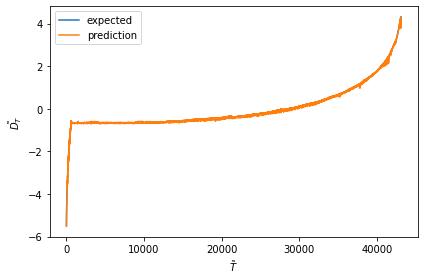

X=[9.0e-01 1.0e+03 4.8e+01], Predicted=[-0.00011585]
X=[9.0e-01 5.0e+03 4.8e+01], Predicted=[-0.00043793]
X=[9.0e-01 1.0e+04 4.8e+01], Predicted=[-0.00143876]
X=[9.0e-01 1.5e+04 4.8e+01], Predicted=[-0.0024788]
X=[9.0e-01 2.0e+04 4.8e+01], Predicted=[-0.00397616]
X=[9.0e-01 2.5e+04 4.8e+01], Predicted=[-0.00561104]
X=[9.0e-01 3.0e+04 4.8e+01], Predicted=[-0.00732339]
X=[9.0e-01 3.5e+04 4.8e+01], Predicted=[-0.00928156]
X=[9.0e-01 4.0e+04 4.8e+01], Predicted=[-0.01102231]
0.9 1000.0 48.0 [-4.30282215e-05]
0.9 5000.0 48.0 [-0.00048246]
0.9 10000.0 48.0 [-0.00136544]
0.9 15000.0 48.0 [-0.00251025]
0.9 20000.0 48.0 [-0.00386889]
0.9 25000.0 48.0 [-0.00541263]
0.9 30000.0 48.0 [-0.00712109]
0.9 35000.0 48.0 [-0.00897922]
0.9 40000.0 48.0 [-0.01097548]



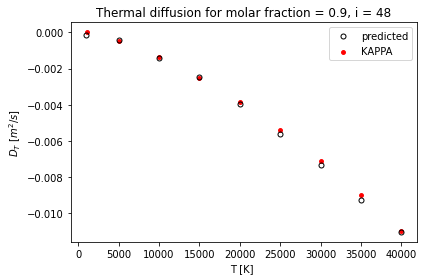

In [72]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel(r'$\tilde{D_T}$')
    plt.xlabel(r'$\tilde{T}$')
    plt.legend()
    plt.tight_layout()
    plt.savefig("adim_regression.pdf", dpi=150)
    plt.show()

# Plot the chart
chart_regression(pred.flatten(), y_test)

# Select some values
Xnew = np.array([[0.9, 1000,  48], [0.9, 5000,  48], [0.9, 10000, 48], [0.9, 15000, 48], [0.9, 20000, 48],
                 [0.9, 25000, 48], [0.9, 30000, 48], [0.9, 35000, 48], [0.9, 40000, 48]])

Xnew = scaler_x.transform(Xnew)
ynew = model.predict(Xnew)

# Invert normalize
ynew = scaler_y.inverse_transform(ynew)
Xnew = scaler_x.inverse_transform(Xnew)

# show the inputs and predicted outputs
for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

print(x[176889,0], x[176889,1], x[176889,2], y[176889]) # 0.9, 1000,  48
print(x[178849,0], x[178849,1], x[178849,2], y[178849]) # 0.9, 5000,  48
print(x[181299,0], x[181299,1], x[181299,2], y[181299]) # 0.9, 10000, 48
print(x[183749,0], x[183749,1], x[183749,2], y[183749]) # 0.9, 15000, 48
print(x[186199,0], x[186199,1], x[186199,2], y[186199]) # 0.9, 20000, 48
print(x[188649,0], x[188649,1], x[188649,2], y[188649]) # 0.9, 25000, 48
print(x[191099,0], x[191099,1], x[191099,2], y[191099]) # 0.9, 30000, 48
print(x[193549,0], x[193549,1], x[193549,2], y[193549]) # 0.9, 35000, 48
print(x[195999,0], x[195999,1], x[195999,2], y[195999]) # 0.9, 40000, 48


print('')

plt.scatter(x[176890,1], y[176890], s=15, label='KAPPA', facecolor='red') # 1000
plt.scatter(x[178849,1], y[178849], s=15, facecolor='red')                # 5000            
plt.scatter(x[181299,1], y[181299], s=15, facecolor='red')                # 10000
plt.scatter(x[183749,1], y[183749], s=15, facecolor='red')                # 15000
plt.scatter(x[186199,1], y[186199], s=15, facecolor='red')                # 20000
plt.scatter(x[188649,1], y[188649], s=15, facecolor='red')                # 25000
plt.scatter(x[191099,1], y[191099], s=15, facecolor='red')                # 30000
plt.scatter(x[193549,1], y[193549], s=15, facecolor='red')                # 35000
plt.scatter(x[195999,1], y[195999], s=15, facecolor='red')                # 40000

plt.plot(Xnew[:,1], ynew[:], 'o', color='black', label='predicted', linewidth=2, markersize=5, fillstyle='none')
plt.title('Thermal diffusion for molar fraction = 0.9, i = 48')
plt.ylabel(r'$D_T$ $[m^2/s]$')
plt.xlabel('T [K] ')
plt.legend()
plt.tight_layout()
plt.savefig("dim_regression.pdf", dpi=150, crop='false')
plt.show()